In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("/content/drive/MyDrive/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/drive/MyDrive/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/MyDrive/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
print("X train shape: {}".format(X_train.shape))
print("X validation shape: {}".format(X_validation.shape))
print("X test shape: {}\n".format(X_test.shape))

print("Y train shape: {}".format(y_train.shape))
print("Y validation shape: {}".format(y_validation.shape))
print("Y test shape: {}\n".format(y_test.shape))

X train shape: (34799, 32, 32, 3)
X validation shape: (4410, 32, 32, 3)
X test shape: (12630, 32, 32, 3)

Y train shape: (34799,)
Y validation shape: (4410,)
Y test shape: (12630,)



In [ ]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


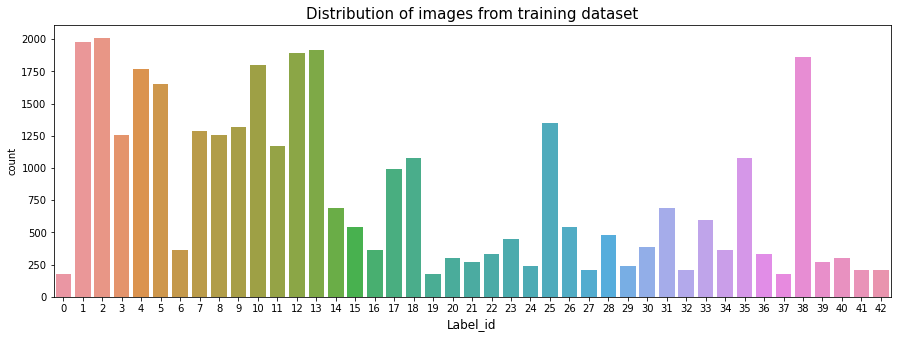

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot(train['labels'])
plt.title('Distribution of images from training dataset', fontsize = 15)
plt.xlabel('Label_id', fontsize=12)
plt.show()

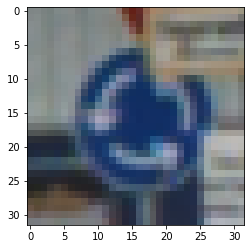

In [ ]:
i = 4232 #Random
plt.imshow(X_train[i])

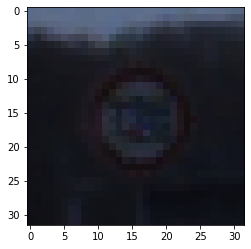

In [ ]:
# Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
plt.imshow(X_train[i], cmap='gray')

In [ ]:
mymodel=Sequential()

mymodel.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=X_train.shape[1:]))
mymodel.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
mymodel.add(MaxPool2D(pool_size=(2,2)))
mymodel.add(Dropout(rate=0.2))

mymodel.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
mymodel.add(MaxPool2D(pool_size=(2,2)))
mymodel.add(Dropout(rate=0.2))

mymodel.add(Flatten())
mymodel.add(Dense(256,activation='relu'))
mymodel.add(Dropout(rate=0.2))
mymodel.add(Dense(43,activation='softmax'))

In [ ]:
epochs=25
batch_size = 64
lr = 0.001
mymodel.compile(loss='categorical_crossentropy',optimizer=Adam(lr=lr),metrics=['accuracy'])
history=mymodel.fit(X_train,
                  y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
544/544 [==============================] - 168s 281ms/step - loss: 4.7798 - accuracy: 0.0511 - val_loss: 3.4013 - val_accuracy: 0.0860
Epoch 2/25
544/544 [==============================] - 153s 281ms/step - loss: 2.1806 - accuracy: 0.4148 - val_loss: 0.6505 - val_accuracy: 0.8254
Epoch 3/25
544/544 [==============================] - 154s 282ms/step - loss: 0.6048 - accuracy: 0.8266 - val_loss: 0.4798 - val_accuracy: 0.8712
Epoch 4/25
544/544 [==============================] - 150s 275ms/step - loss: 0.4224 - accuracy: 0.8724 - val_loss: 0.4431 - val_accuracy: 0.8800
Epoch 5/25
544/544 [==============================] - 146s 269ms/step - loss: 0.3740 - accuracy: 0.8872 - val_loss: 0.4016 - val_accuracy: 0.8880
Epoch 6/25
544/544 [==============================] - 150s 275ms/step - loss: 0.3217 - accuracy: 0.9032 - val_loss: 0.4429 - val_accuracy: 0.8867
Epoch 7/25
544/544 [==============================] - 150s 275ms/step - loss: 0.2926 - accuracy: 0.9134 - val_loss: 0.3879 -

Test Loss : 0.4024
Test Accuracy : 0.9207


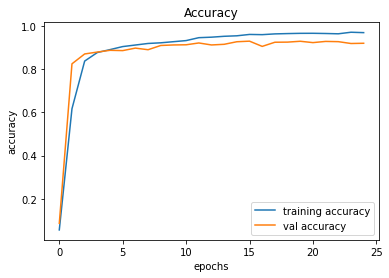

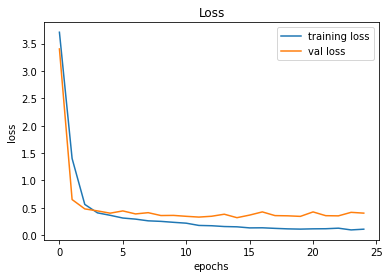

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig("test_acc")

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig("test_loss")

score = mymodel.evaluate(X_test, y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

In [ ]:
pred = mymodel.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [32]:
!pip install visualkeras
import visualkeras

     |████████████████████████████████| 798kB 29.4MB/s 


In [34]:
import visualkeras

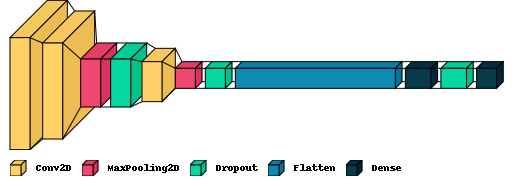

In [36]:
visualkeras.layered_view(mymodel, legend=True)

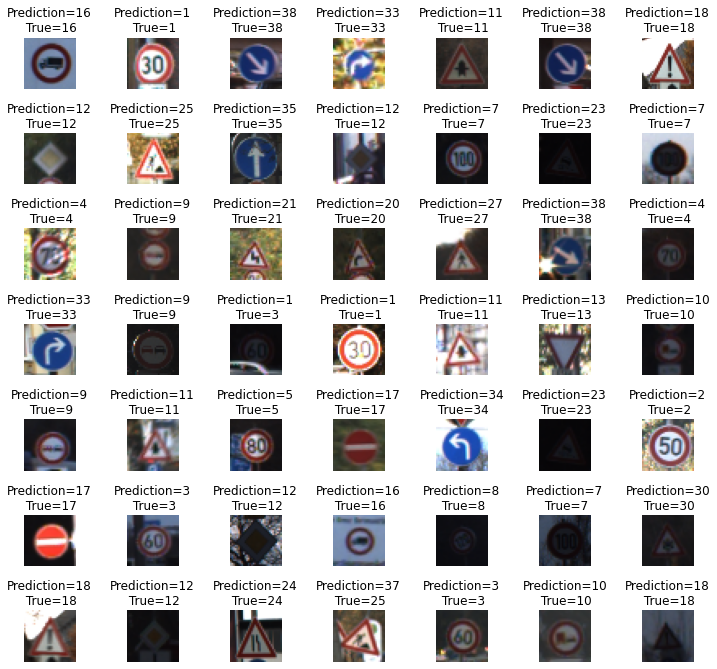

In [33]:
y_true =  test['labels']
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(pred[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)